<a href="https://colab.research.google.com/github/Riyaz402p/Classifcation_Infosys_Internship_Oct2024/blob/main/CD02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!kaggle datasets download -d dinesh873/dog-vs-cat-data

Dataset URL: https://www.kaggle.com/datasets/dinesh873/dog-vs-cat-data
License(s): MIT
100% 1.06G/1.06G [00:56<00:00, 24.3MB/s]
100% 1.06G/1.06G [00:56<00:00, 20.4MB/s]


In [ ]:
import zipfile
import os


# Path to the ZIP file
zip_path = '/content/dog-vs-cat-data.zip'

# Extraction path
extract_path = '/content/catvsdog'

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List extracted files
print("Extracted files:", os.listdir(extract_path))


Extracted files: ['train', 'dogs_vs_cats', 'test']


In [ ]:
import os

# Check the structure of the 'train' folder
train_dir = '/content/catvsdog/train'
print("Train directory contents:", os.listdir(train_dir))

# Check the structure of the 'test' folder
test_dir = '/content/catvsdog/test'
print("Test directory contents:", os.listdir(test_dir))


Train directory contents: ['dogs', 'cats']
Test directory contents: ['dogs', 'cats']


In [ ]:
import os

# Paths to train and test directories
train_dir = '/content/catvsdog/train'
test_dir = '/content/catvsdog/test'

def count_images_in_folder(folder_path):
    # Dictionary to store counts for each subfolder
    image_counts = {}
    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        if os.path.isdir(subfolder_path):
            # Count all files in the subfolder
            image_counts[subfolder] = len([
                f for f in os.listdir(subfolder_path)
                if os.path.isfile(os.path.join(subfolder_path, f))
            ])
    return image_counts

# Count images in train and test directories
train_image_counts = count_images_in_folder(train_dir)
test_image_counts = count_images_in_folder(test_dir)

print("Train Image Counts:", train_image_counts)
print("Test Image Counts:", test_image_counts)


Train Image Counts: {'dogs': 10000, 'cats': 10000}
Test Image Counts: {'dogs': 2500, 'cats': 2500}


In [ ]:
import sys
from matplotlib import pyplot as plt
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
                     padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform',
                     padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))

    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',
                     padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))

    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))

    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    opt = Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
import numpy as np
import pandas as pd

# Run the test harness for evaluating a model
def run_test_harness():
    model = define_model()
    datagen = ImageDataGenerator(rescale=1.0/255.0)

    # Prepare iterators for training and testing datasets
    train_it = datagen.flow_from_directory(
        '/content/catvsdog/train/',
        batch_size=32,
        target_size=(200, 200),
        class_mode='binary'
    )

    test_it = datagen.flow_from_directory(
        '/content/catvsdog/test/',
        batch_size=32,
        target_size=(200, 200),
        class_mode='binary'
    )

    # Store accuracy and loss values
    train_acc = []
    val_acc = []
    train_loss = []
    val_loss = []

    # Fit the model with correct steps_per_epoch and validation_steps
    history = model.fit(
        train_it,
        validation_data=test_it,
        epochs=60,
    )

    # Extract accuracy and loss values for each epoch
    for epoch in range(60):  # assuming 40 epochs
        train_acc.append(history.history['accuracy'][epoch])
        val_acc.append(history.history['val_accuracy'][epoch])
        train_loss.append(history.history['loss'][epoch])
        val_loss.append(history.history['val_loss'][epoch])

    # Save the values in a DataFrame or CSV
    data = {
        'Epoch': np.arange(1, 61),
        'Train Accuracy': train_acc,
        'Val Accuracy': val_acc,
        'Train Loss': train_loss,
        'Val Loss': val_loss
    }

    df = pd.DataFrame(data)
    df.to_csv('/content/training_history.csv', index=False)  # Save to CSV in the Colab directory

    print(df)



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_from_csv(file_path):
    # Read the CSV file
    data = pd.read_csv(file_path)

    # Check if required columns exist
    required_columns = {"Epoch", "Train Accuracy", "Val Accuracy", "Train Loss", "Val Loss"}
    if not required_columns.issubset(data.columns):
        print(f"CSV file must contain the columns: {required_columns}")
        return

    # Plot accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(data['Epoch'], data['Train Accuracy'], label='Train Accuracy', marker='o')
    plt.plot(data['Epoch'], data['Val Accuracy'], label='Validation Accuracy', marker='o')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(data['Epoch'], data['Train Loss'], label='Train Loss', marker='o')
    plt.plot(data['Epoch'], data['Val Loss'], label='Validation Loss', marker='o')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Show plots
    plt.tight_layout()
    plt.show()

In [ ]:
run_test_harness()

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 86ms/step - accuracy: 0.5120 - loss: 0.8222 - val_accuracy: 0.5762 - val_loss: 0.6863
Epoch 2/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 82ms/step - accuracy: 0.5707 - loss: 0.6809 - val_accuracy: 0.6360 - val_loss: 0.6661
Epoch 3/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.6274 - loss: 0.6571 - val_accuracy: 0.6986 - val_loss: 0.5827
Epoch 4/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 80ms/step - accuracy: 0.6838 - loss: 0.5841 - val_accuracy: 0.7286 - val_loss: 0.5416
Epoch 5/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.7142 - loss: 0.5428 - val_accuracy: 0.7490 - val_loss: 0.5219
Epoch 6/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.7372 - loss: 0.5154 - val_accuracy: 0.7582 - val_loss: 0.5056
Epoch 7/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.7515 - loss: 0.4900 - val_accuracy: 0.7516 - val_loss: 0.5006
Epoch

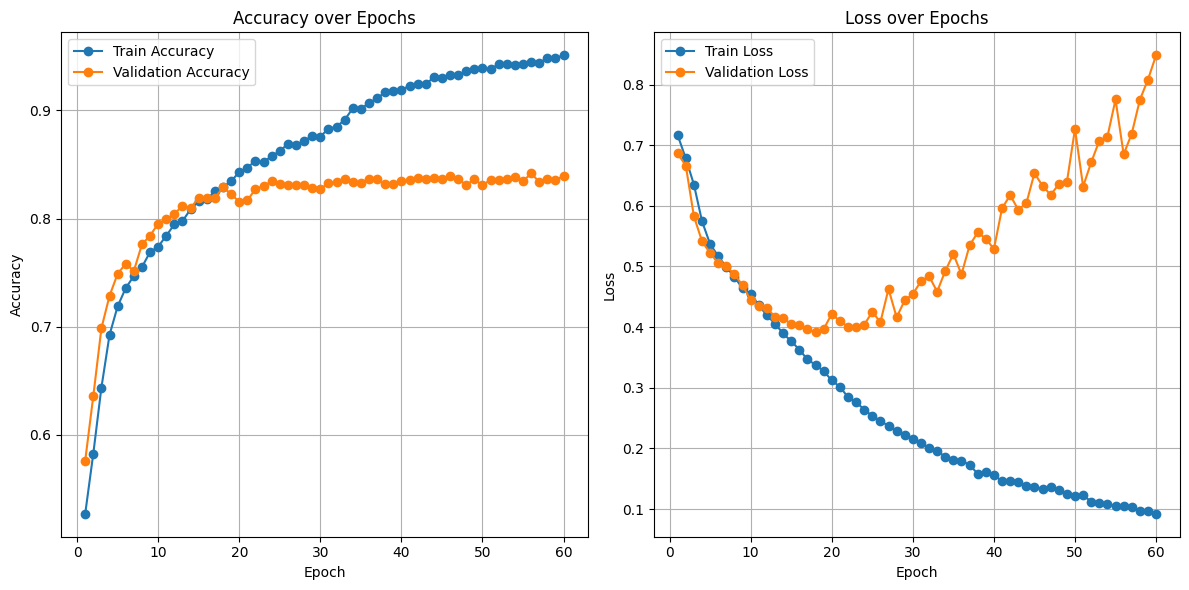

In [ ]:
plot_from_csv('/content/training_history.csv')

In [ ]:
import numpy as np
import pandas as pd

# Run the test harness for evaluating a model
def run_test_harness():
    model = define_model()
    datagen = ImageDataGenerator(rescale=1.0/255.0)

    # Prepare iterators for training and testing datasets
    train_it = datagen.flow_from_directory(
        '/content/catvsdog/train/',
        batch_size=32,
        target_size=(200, 200),
        class_mode='binary'
    )

    test_it = datagen.flow_from_directory(
        '/content/catvsdog/test/',
        batch_size=32,
        target_size=(200, 200),
        class_mode='binary'
    )

    # Store accuracy and loss values
    train_acc = []
    val_acc = []
    train_loss = []
    val_loss = []

    # Fit the model with correct steps_per_epoch and validation_steps
    history = model.fit(
        train_it,
        validation_data=test_it,
        epochs=55,
    )

    # Extract accuracy and loss values for each epoch
    for epoch in range(55):  # assuming 40 epochs
        train_acc.append(history.history['accuracy'][epoch])
        val_acc.append(history.history['val_accuracy'][epoch])
        train_loss.append(history.history['loss'][epoch])
        val_loss.append(history.history['val_loss'][epoch])

    # Save the values in a DataFrame or CSV
    data = {
        'Epoch': np.arange(1, 56),
        'Train Accuracy': train_acc,
        'Val Accuracy': val_acc,
        'Train Loss': train_loss,
        'Val Loss': val_loss
    }

    df = pd.DataFrame(data)
    df.to_csv('/content/training_history.csv', index=False)  # Save to CSV in the Colab directory

    print(df)



In [ ]:
run_test_harness()


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/55
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 84ms/step - accuracy: 0.5577 - loss: 0.8465 - val_accuracy: 0.6670 - val_loss: 0.6271
Epoch 2/55
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 82ms/step - accuracy: 0.6794 - loss: 0.5885 - val_accuracy: 0.7072 - val_loss: 0.5720
Epoch 3/55
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 82ms/step - accuracy: 0.7202 - loss: 0.5490 - val_accuracy: 0.7482 - val_loss: 0.5224
Epoch 4/55
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 84ms/step - accuracy: 0.7474 - loss: 0.5112 - val_accuracy: 0.7100 - val_loss: 0.5420
Epoch 5/55
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 80ms/step - accuracy: 0.7745 - loss: 0.4689 - val_accuracy: 0.7794 - val_loss: 0.4690
Epoch 6/55
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.7958 - loss: 0.4410 - val_accuracy: 0.7670 - val_loss: 0.4800
Epoch 7/55
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 83ms/step - accuracy: 0.8193 - loss: 0.4004 - val_accuracy: 0.7986 - val_loss: 0.4327
Epoch

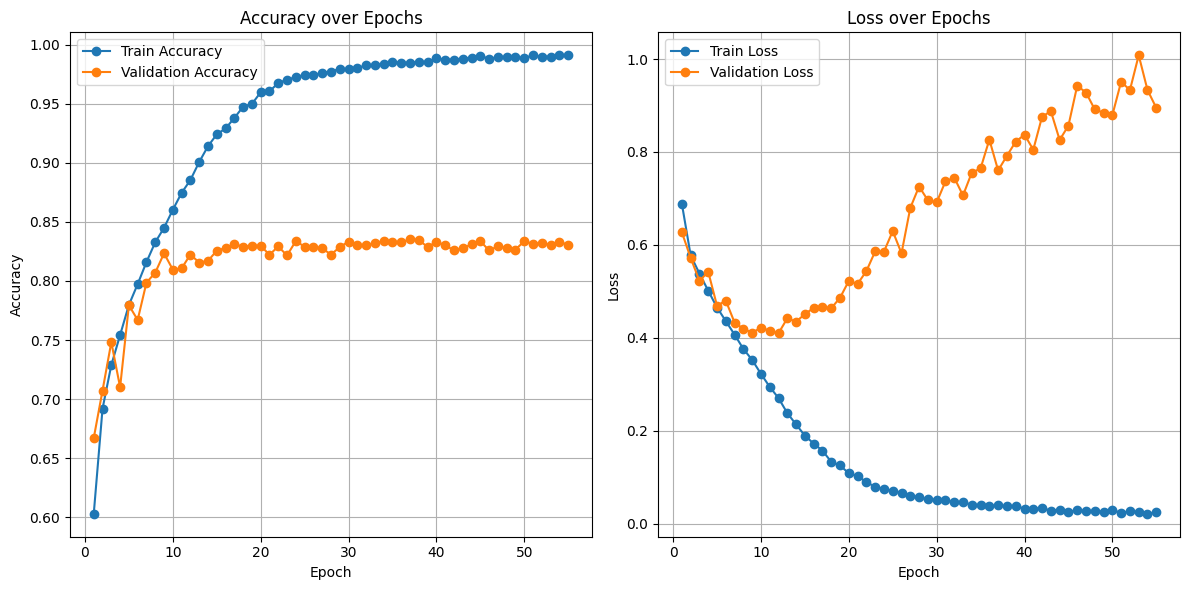

In [ ]:
plot_from_csv('/content/training_history06.csv')